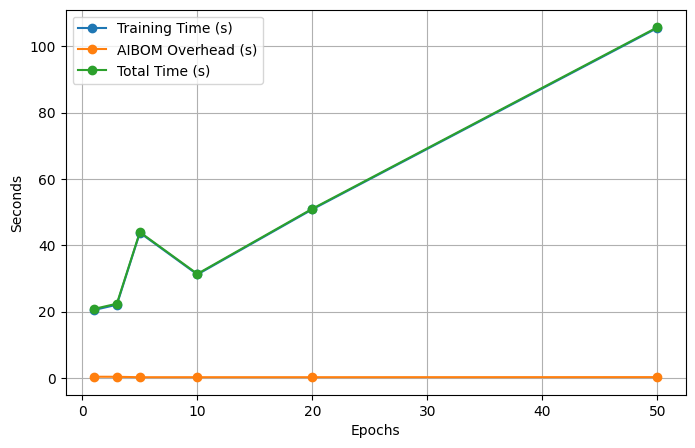

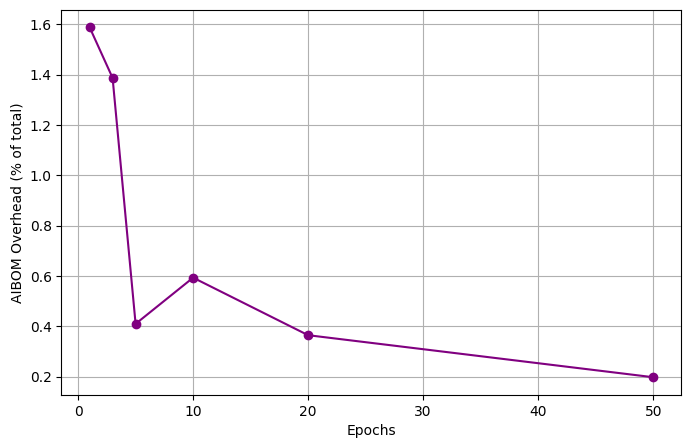

,Epochs,Training Time (s),AIBOM Time (s),Total Time (s),AIBOM Overhead (%)
0,1,20.445,0.330,20.775,1.588448
1,3,22.040,0.310,22.350,1.387025
2,5,43.763,0.180,43.943,0.409622
3,10,31.168,0.186,31.354,0.593226
4,20,50.825,0.186,51.011,0.364627
5,50,105.545,0.209,105.754,0.197628


In [1]:
# analysis.ipynb

# Cell 1: Imports and Data
from datetime import datetime
import matplotlib.pyplot as plt

epochs_list = [1, 3, 5, 10, 20, 50]
training_started = ["UTC: 2025-05-20 19:39:48,335", "UTC: 2025-05-20 19:39:47,891",
                    "UTC: 2025-05-20 19:39:35,070", "UTC: 2025-05-20 19:40:12,332", "UTC: 2025-05-20 19:40:12,605", "2025-05-20 20:08:39,963"]
aibom_started = ["UTC: 2025-05-20 19:40:08,780", "UTC: 2025-05-20 19:40:09,931",
                 "UTC: 2025-05-20 19:40:18,833", "UTC: 2025-05-20 19:40:43,500", "UTC: 2025-05-20 19:41:03,430", "2025-05-20 20:10:25,508"]
completion = ["UTC: 2025-05-20 19:40:09,110", "UTC: 2025-05-20 19:40:10,241",
              "UTC: 2025-05-20 19:40:19,013", "UTC: 2025-05-20 19:40:43,686", "UTC: 2025-05-20 19:41:03,616", "2025-05-20 20:10:25,717"]

def parse_utc(s):
    return datetime.strptime(s.replace("UTC: ", ""), "%Y-%m-%d %H:%M:%S,%f")

# Cell 2: Calculate timings
train_times = []
aibom_times = []
total_times = []

for i in range(len(epochs_list)):
    t_start = parse_utc(training_started[i])
    t_aibom = parse_utc(aibom_started[i])
    t_end = parse_utc(completion[i])
    train_time = (t_aibom - t_start).total_seconds()
    aibom_time = (t_end - t_aibom).total_seconds()
    total_time = (t_end - t_start).total_seconds()
    train_times.append(train_time)
    aibom_times.append(aibom_time)
    total_times.append(total_time)

# Cell 3: Plot Training Time vs Epochs
plt.figure(figsize=(8,5))
plt.plot(epochs_list, train_times, marker='o', label='Training Time (s)')
plt.plot(epochs_list, aibom_times, marker='o', label='AIBOM Overhead (s)')
plt.plot(epochs_list, total_times, marker='o', label='Total Time (s)')
plt.xlabel('Epochs')
plt.ylabel('Seconds')
plt.legend()
plt.grid(True)
plt.show()

# Cell 4: Plot AIBoM Overhead as Percentage of Total Time
import numpy as np
overhead_pct = np.array(aibom_times) / np.array(total_times) * 100

plt.figure(figsize=(8,5))
plt.plot(epochs_list, overhead_pct, marker='o', color='purple')
plt.xlabel('Epochs')
plt.ylabel('AIBOM Overhead (% of total)')
plt.grid(True)
plt.show()

# Cell 5: Print Table
import pandas as pd
df = pd.DataFrame({
    "Epochs": epochs_list,
    "Training Time (s)": train_times,
    "AIBOM Time (s)": aibom_times,
    "Total Time (s)": total_times,
    "AIBOM Overhead (%)": overhead_pct
})
df

## Analysis Summary

- The training time increases with the number of epochs, as expected.
- The AIBOM generation time remains nearly constant, regardless of the number of epochs.
- The percentage overhead of AIBOM generation decreases as training time increases.
- The outlier at 5 epochs (slower training) is explained by system resource contention: with 3 workers running in parallel, the third job suffered from reduced performance.
- This confirms that AIBOM generation overhead is independent of training time and becomes negligible for longer training jobs.